# A graphical example

In [92]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import utils
from six import StringIO


In [93]:
dataset = pd.DataFrame({
    'x_0':[7,3,2,1,2,4,1,8,6,7,8,9],
    'x_1':[1,2,3,5,6,7,9,10,5,8,4,6],
    'y': [0,0,0,0,0,0,1,1,1,1,1,1]})

dataset

,x_0,x_1,y
0,7,1,0
1,3,2,0
2,2,3,0
3,1,5,0
4,2,6,0
5,4,7,0
6,1,9,1
7,8,10,1
8,6,5,1
9,7,8,1


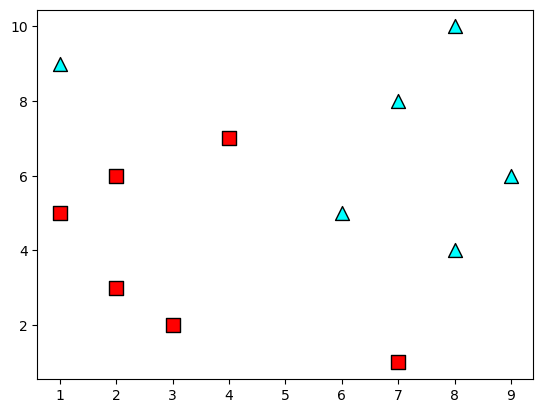

In [94]:
features = dataset[['x_0', 'x_1']]
labels = dataset['y']

utils.plot_points(features, labels)

# Building a decision tree using Gini index

In [95]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(features, labels)
decision_tree.score(features, labels)

1.0

In [96]:
import numpy as np
from matplotlib import pyplot
from io import StringIO  # Correct import
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

def display_tree(dt):
    # Create DOT data
    dot_data = StringIO()
    export_graphviz(dt, out_file=dot_data, filled=True, rounded=True, special_characters=True)
    
    # Generate a graph from DOT data
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    
    # Create and display the image
    return Image(graph.create_png())



# Some functions to plot our points and draw the models
def plot_points(features, labels, size_of_points=100):
    X = np.array(features)
    y = np.array(labels)
    spam = X[np.argwhere(y==1)]
    ham = X[np.argwhere(y==0)]
    pyplot.scatter([s[0][0] for s in spam],
                [s[0][1] for s in spam],
                s = size_of_points,
                color = 'cyan',
                edgecolor = 'k',
                marker = '^')
    pyplot.scatter([s[0][0] for s in ham],
                [s[0][1] for s in ham],
                s = size_of_points,
                color = 'red',
                edgecolor = 'k',
                marker = 's')
    #pyplot.xlabel('GRE')
    #pyplot.ylabel('TOEFL')
    #pyplot.legend(['Admitted','Not admitted'])

def plot_model(X, y, model, size_of_points=100):
    X = np.array(X)
    y = np.array(y)
    plot_step = 0.2
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    pyplot.contourf(xx, yy, Z, colors=['red', 'blue'], alpha=0.2, levels=range(-1,2))
    pyplot.contour(xx, yy, Z,colors = 'k',linewidths = 1)
    plot_points(X, y, size_of_points)
    pyplot.show()


def display_tree(dt):
    from io import StringIO  # Updated import
    from IPython.display import Image
    from sklearn.tree import export_graphviz
    import pydotplus

    # Create DOT data
    dot_data = StringIO()
    export_graphviz(dt, out_file=dot_data, filled=True, rounded=True, special_characters=True)
    
    # Generate a graph from DOT data
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    
    # Create and display the image
    return Image(graph.create_png())



"""
def display_tree(dt):
    from sklearn.externals.six import StringIO  
    from IPython.display import Image  
    from sklearn.tree import export_graphviz
    import pydotplus
    dot_data = StringIO()
    export_graphviz(dt, out_file=dot_data,  
                    filled=True, rounded=True,
                    special_characters=True)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
    return Image(graph.create_png())
"""

def plot_regressor(model, features, labels):
    x = np.linspace(0,85,1000)
    pyplot.scatter(features, labels)
    pyplot.plot(x, model.predict(x.reshape([-1,1])))
    pyplot.xlabel("Age")
    pyplot.ylabel("Days per week")
    pyplot.show()

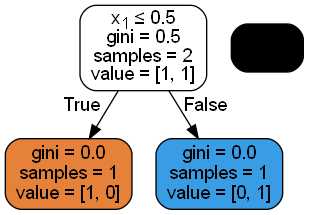

In [97]:
from sklearn.tree import DecisionTreeClassifier

# Example data
X = [[0, 0], [1, 1]]
y = [0, 1]

dt = DecisionTreeClassifier()
dt.fit(X, y)

# Display the tree
display_tree(dt)

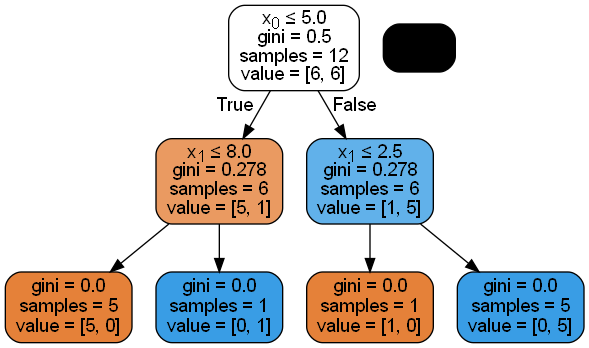

In [98]:
display_tree(decision_tree)

In [99]:
# utils.display_tree(decision_tree)

c:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


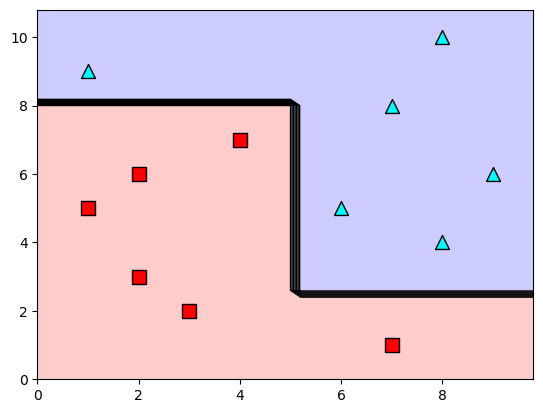

In [100]:
utils.plot_model(features, labels, decision_tree)

# Building a decision tree using entropy

In [101]:
decision_tree_entropy = DecisionTreeClassifier(criterion='entropy')
decision_tree_entropy.fit(features, labels)
decision_tree_entropy.score(features, labels)

1.0

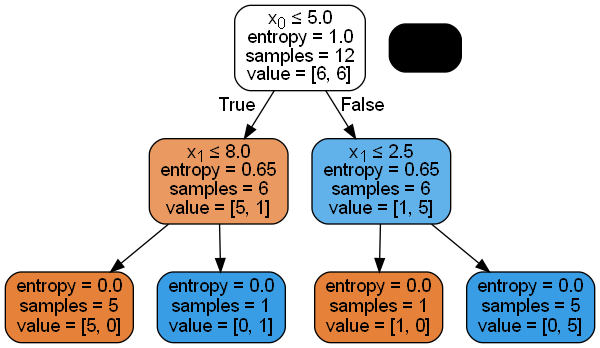

In [103]:
#utils.display_tree(decision_tree_entropy)
display_tree(decision_tree_entropy)

In [ ]:
utils.plot_model(features, labels, decision_tree_entropy)

# Building a decision tree of depth one (a vertical or horizontal line)

c:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


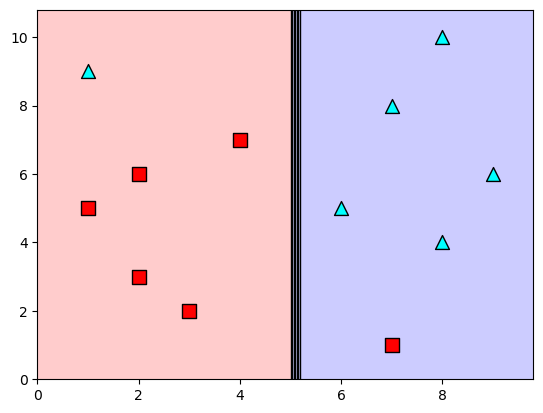

In [104]:
decision_tree_depth_1 = DecisionTreeClassifier(max_depth=1)
decision_tree_depth_1.fit(features, labels)
decision_tree_depth_1.score(features, labels)
utils.plot_model(features, labels, decision_tree_depth_1)

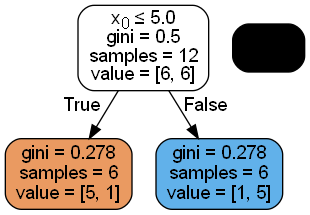

In [106]:
# utils.display_tree(decision_tree_depth_1)

display_tree(decision_tree_depth_1)